# Traitement données Antoine

## Nettoyage

### Chargement des données

Récupèrer la liste des noms de fichier pour Antoine (ces fichiers sont placés dans un repertoire 'data/antoine_texte')

In [1]:
import os 
import pandas as pd 

os.getcwd()
os.chdir('C:\\Users\\Lamou\\Desktop\\MIASHS\\TER_a\\data\\antoine_texte')
listing=os.listdir() # On crée une liste de tout les noms des fichiers

In [2]:
#listing


### Lecture des données

* Définir le nom des colonnes selon le fichier final attendu
* Lire chaque fichier de la liste 
* Ajouter le nom de l'enfant et son age

In [3]:
os.chdir('C:\\Users\\Lamou\\Desktop\\MIASHS\\TER_a\\data\\antoine_texte')

d = {} # Le dictionnaire contenant les noms des fichiers
nom_col = ['type', 'seconde_debut', 'seconde_fin', 'contenu']
rows = 0 #Compteur de ligne pour vérifier la perte de données

for file in listing: 
    d[file]=pd.read_csv(file, 
                        sep = '\t', 
                        names = nom_col, 
                        header = None)  

    # On ajoute le nom de l'enfant
    nom_pos1 = nom_pos1 = 0
    nom_pos2 = file.find('-')
    nom = file[nom_pos1:nom_pos2]
    d[file]['enfant'] = nom
    
    #On ajoute l'age de l'enfant
    age_pos1 = file.find('_')-1
    age_pos2 = file.find('.')
    age = file[age_pos1:age_pos2]
    d[file]['age'] = age
    
    rows += len(d[file])
    
    
# DataFrame contenant toutes les lignes de l'enfant
data = pd.concat([d[file] for file in listing], 
                 sort=False,
                 ignore_index=True) 

In [4]:
#data

### Vérification de la perte de données

On vérifie qu'il y a autant de ligne lu (variable rows) que de ligne écritent (len(data))

In [5]:
print(rows == len(data))

True


### Création du fichier enfant format csv

In [6]:
# Création du fichier enfant
os.chdir('C:\\Users\\Lamou\\Desktop\\MIASHS\\TER_a\\data')
data.to_csv('data_antoine_final.csv',
           encoding = 'utf-8',
           sep = '\t',
           header = True)

### Lecture fichier enfant

In [7]:
os.chdir('C:\\Users\\Lamou\\Desktop\\MIASHS\\TER_a\\data')
data_antoine = pd.read_csv('data_antoine_final.csv',
                           sep = '\t',
                           encoding = 'utf-8',
                           index_col=False)

# On supprime la colonne qui duplique les index
data_antoine = data_antoine.drop(columns = 'Unnamed: 0')

In [8]:
#data_antoine

## Exploration des données

Qu'elles sont les différents type de ligne ?

In [9]:
print(len(data_antoine['type'].unique()))

51


Il existe 51 types de ligne dans les fichiers Antoine :

In [10]:
print(data_antoine['type'].unique())

['+div+' 'CHI' 'FAT' 'act' 'OBS' 'com' '-div-' 'MOT' 'ANN' 'UNK' 'GRM'
 'pho' 'sit' 'int' 'xpnt' 'add' 'AUN' 'ADU' 'xpol' 'VIS' 'ximi' 'exp'
 'xpho' 'GDM' 'UNI' 'BOY' 'GIR' 'gls' 'gpx' 'fac' 'xdia' 'tim' 'xnpt'
 'CPT' 'JEN' 'WOM' 'mor' 'GDF' 'lia' 'COL' 'VOI' 'CHA' 'COM' 'COU' 'xrep'
 'NAN' 'UNC' 'CAM' 'BRO' 'BAB' 'xpt']


### Phonèmes

Les lignes de type 'pho' correspondent à la traduction phonétique lorsque Antoine s'exprime :
* Nous avons à disposition 16116 traductions pour Antoine 
* On distingue les premiers mots d'Antoine à l'age d'un an et 14 jours
* Les traductions s'arrêtent à l'age de 6 ans 3 mois et 8 jours

In [11]:
pho_antoine = data_antoine[data_antoine['type'] == 'pho']
#pho_antoine

In [12]:
xpho_antoine = data_antoine[data_antoine['type'] == 'xpho']
#xpho_antoine

### Valeurs NaN

Il existe 4 valeurs NaN dans la colonne contenu, nous allons les supprimer :

In [13]:
pho_antoine.loc[pho_antoine['contenu'].isna()]

,type,seconde_debut,seconde_fin,contenu,enfant,age
2152,pho,NaN,NaN,NaN,ANTOINE,1_00_24
2372,pho,NaN,NaN,NaN,ANTOINE,1_00_24
23672,pho,NaN,NaN,NaN,ANTOINE,1_07_15
29960,pho,NaN,NaN,NaN,ANTOINE,1_08_05


In [14]:
#Supprime les 4 lignes
pho_antoine = pho_antoine.dropna(subset=['type', 'contenu'])

Nous allons chercher à visualiser la quantité de données à disposition

## Visualisation 

### Ajout des colonnes 'année', 'mois' et 'jour'

On considère que la colonne age a pout format : x_xx_xx (année_mois_jour) ainsi :
* ``pho_antoine['age'][0:1]`` nous donne le nombre d'année
* ``pho_antoine['age'][2:4]`` nous donne le nombre de mois
* ``pho_antoine['age'][5:7]`` nous donne le nombre de jours

In [15]:
# Ajout du nombre d'année
année_pho_antoine = pho_antoine.apply(lambda row: row['age'][0:1], axis=1)
pho_antoine['année'] = année_pho_antoine

# Ajout du nombre de mois
mois_pho_antoine = pho_antoine.apply(lambda row: row['age'][2:4], axis=1)
pho_antoine['mois'] = mois_pho_antoine

# Ajout du nombre de jour
jour_pho_antoine = pho_antoine.apply(lambda row: row['age'][5:7], axis=1)
pho_antoine['jour'] = jour_pho_antoine

In [16]:
#pho_antoine

### Quantité de données

Combien avons-nous de ligne pour chaque année ? mois ?

In [17]:
pho_antoine[{'année','contenu'}].groupby('année').count()

,contenu
année,
1,3574
2,7291
3,2456
4,2215
5,575
6,1


On voit que pour l'année 6 nous n'avons qu'une seule phrase, faisont de même pour les mois :

In [18]:
nb_phrase_annee_mois = pho_antoine[{'année','mois','contenu'}].groupby(['année','mois']).count()
nb_phrase_annee_mois.rename(columns={'contenu': 'nb_phrase'})

nb_phrase
année mois           
1     00          186
      01          187
      02          170
      03          187
      04          276
      05          256
      06          208
      07          185
      08          403
      09          585
      10          305
      11          626
2     00          829
      01          837
      02         1195
      03          814
      04          706
      05          386
      06          430
      07          476
      08          415
      09          631
      11          572
3     00          589
      02          360
      05          536
      07          425
      09          546
4     00          428
      02          447
      05          721
      08          615
      10            4
5     02          566
      04            5
      07            4
6     03            1

* Nous avons moins de 5 phrases pour les ages 4_00_xx | 5_04_xx | 5_07_xx | 6_03_xx
* On voit qu'il manque des mois :
    * ...

In [28]:
nb_phrase_annee_mois.unstack(level=0)

contenu                                  
année       1       2      3      4      5    6
mois                                           
00      186.0   829.0  589.0  428.0    NaN  NaN
01      187.0   837.0    NaN    NaN    NaN  NaN
02      170.0  1195.0  360.0  447.0  566.0  NaN
03      187.0   814.0    NaN    NaN    NaN  1.0
04      276.0   706.0    NaN    NaN    5.0  NaN
05      256.0   386.0  536.0  721.0    NaN  NaN
06      208.0   430.0    NaN    NaN    NaN  NaN
07      185.0   476.0  425.0    NaN    4.0  NaN
08      403.0   415.0    NaN  615.0    NaN  NaN
09      585.0   631.0  546.0    NaN    NaN  NaN
10      305.0     NaN    NaN    4.0    NaN  NaN
11      626.0   572.0    NaN    NaN    NaN  NaN

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD6F025160>,
      dtype=object)

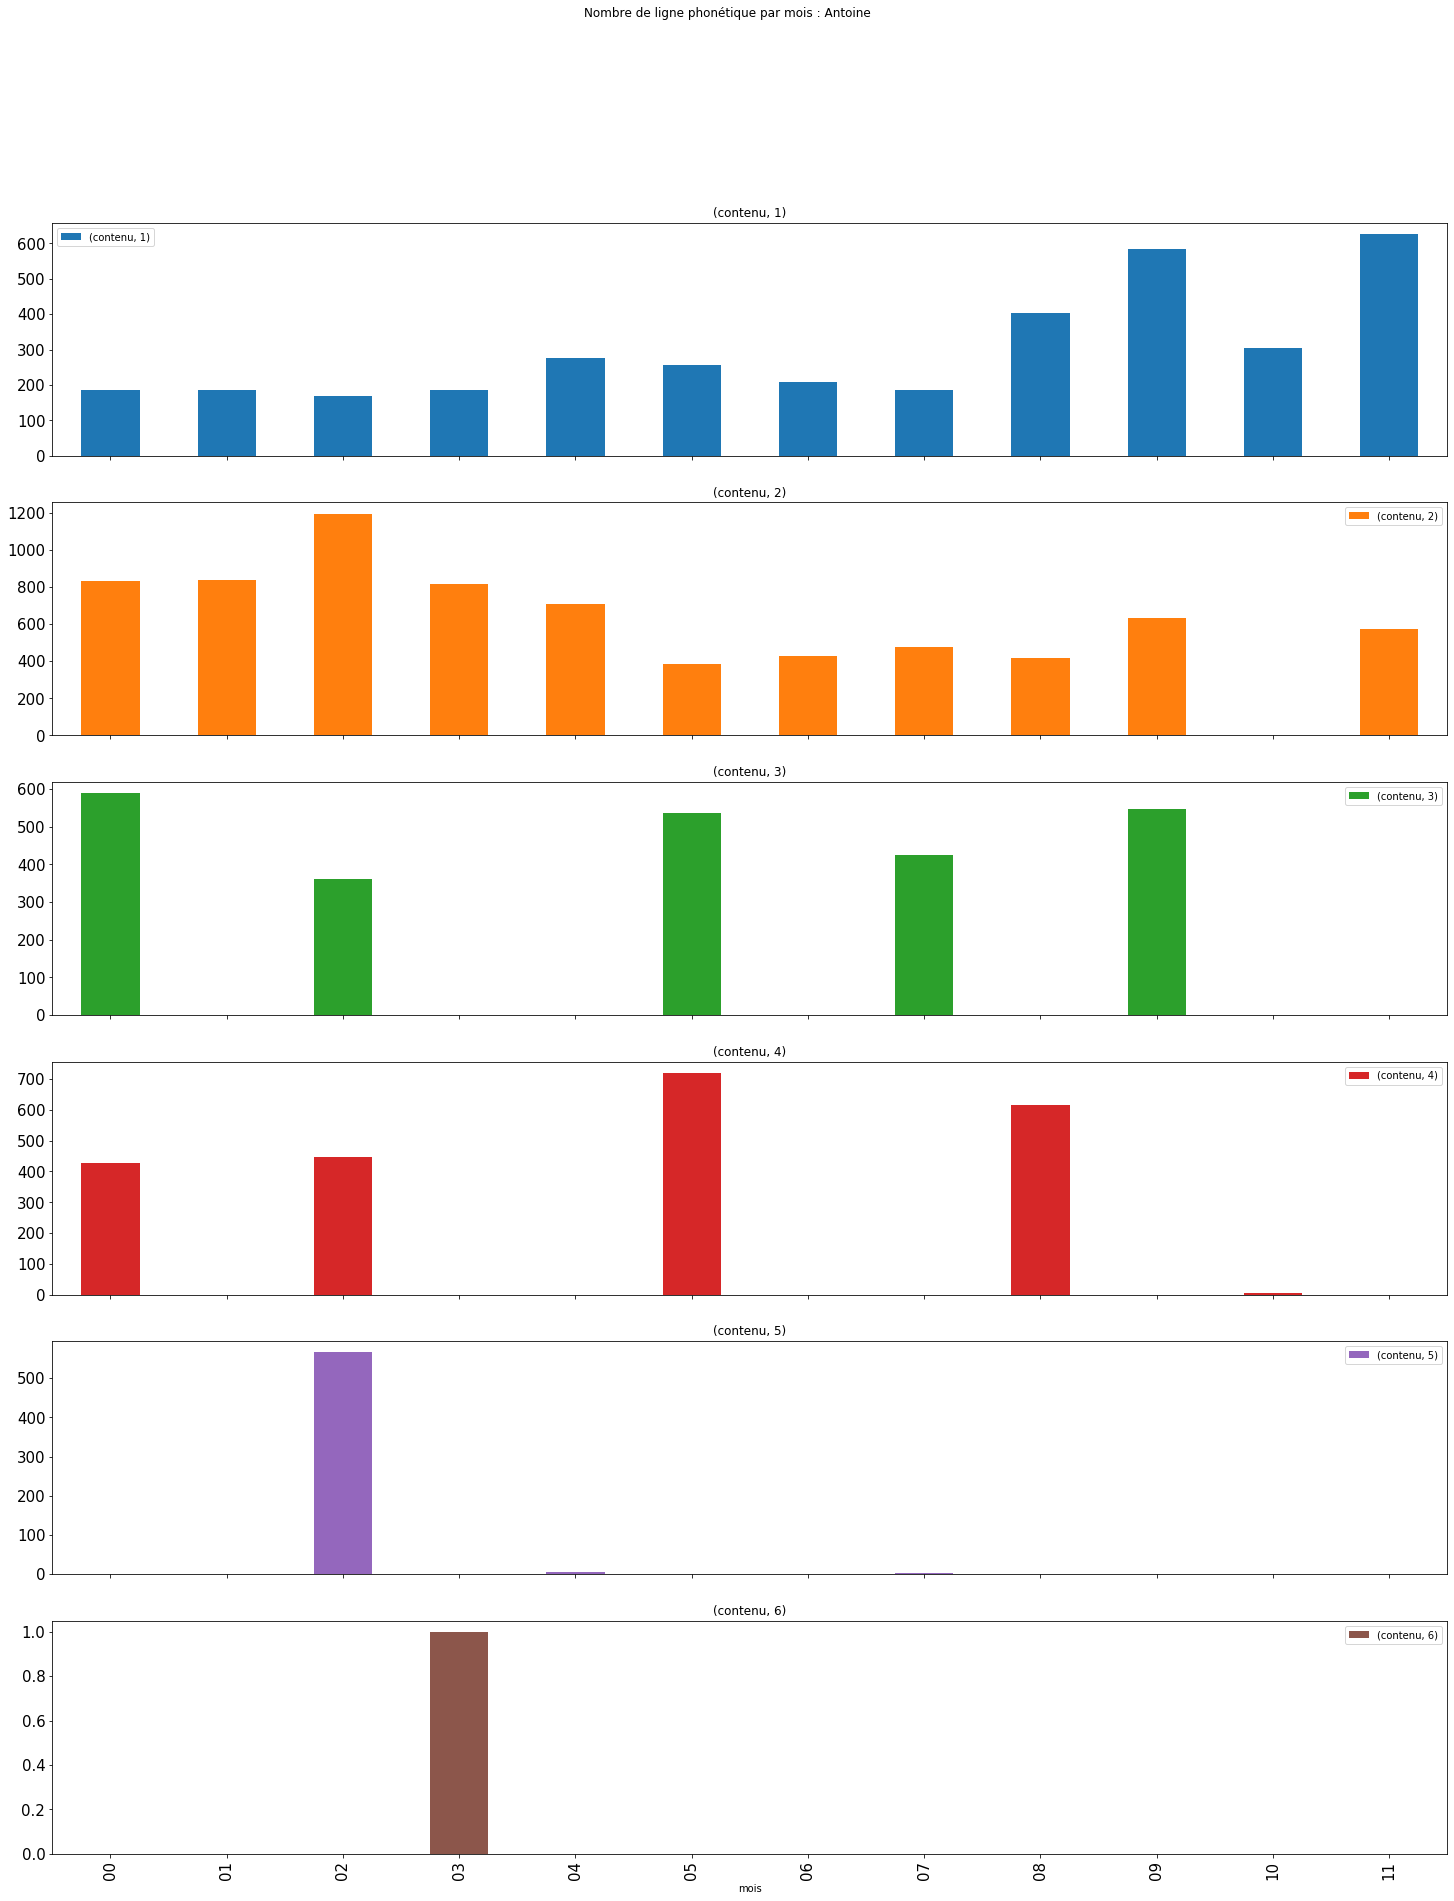

In [60]:
nb_phrase_annee_mois.unstack(level=0).plot(kind='bar', 
                                        subplots=True, 
                                        figsize=(25, 30),
                                        title = 'Nombre de ligne phonétique par mois : Antoine',
                                        fontsize = 15,
                                        use_index = True)

On a une vision du nombre de données phonétiques à disposition et de leur répartition dans le temps 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD6E100748>],
      dtype=object)

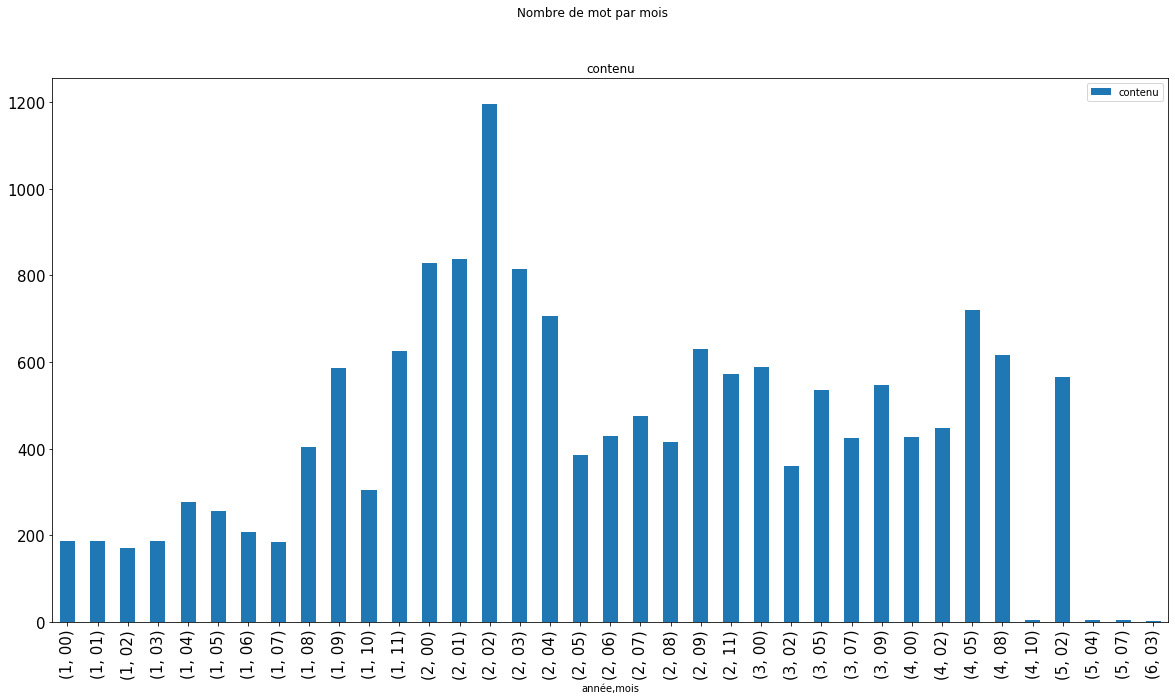

In [58]:
nb_phrase_annee_mois.plot(kind='bar', 
                       subplots=True, 
                       figsize=(20,10),
                       title = 'Nombre de mot par mois',
                       fontsize = 15,
                       use_index = True)

## Nombre de mot
Nous allons chercher à explorer le nombre de mot au sens phonétique par phrase. <br>
Pour cela on peut compter le nombre d'espace dans la chaîne de caractère :

In [22]:
# Exemple 
pho = pho_antoine.at[141596, 'contenu']
print('Nombre de mot dans "' + pho + ' : '+ str(pho.count(' ')+1))

Nombre de mot dans "epɥi ʁəgaʁd la kɑ̃ t a f t ɛ fe tudududu sa fɛ kɔm sa : 15


Pour chaque ligne on calcul le nombre de mot phonétique :

In [23]:
nb_mot_pho = pho_antoine.apply(lambda row: row['contenu'].count(' ')+1, axis=1)
pho_antoine['nombre_mot_phonétique'] = nb_mot_pho #On ajoute une colonne contenant le nombre de mot

Par exemple on peut avoir la phrase d'Antoine avec le plus grand nombre de mot :

In [24]:
pho_antoine.loc[pho_antoine['nombre_mot_phonétique'] == pho_antoine['nombre_mot_phonétique'].max()].contenu.values

array(['əm matjø mwa ʒ e fini tu lə skɔtʃ alɔʁ i fo k t ɑ̃ ʁəmɛt dɑ̃ ʁəpʁɑ̃d dy skotʃ paʁskə j ɑ̃na ply si si dəmɛ̃ matɛ̃ ʒ vø akʁoʃe ɑ̃kɔʁ dɛ dɛsɛ̃ ʃe mwa'],
      dtype=object)

### Espérance de mot par phrase

In [31]:
mean_nb_mot_pho_antoine = pho_antoine[{'année','mois','nombre_mot_phonétique'}].groupby(['année','mois']).mean()
mean_nb_mot_pho_antoine

nombre_mot_phonétique
année mois                       
1     00                 1.161290
      01                 1.122995
      02                 1.164706
      03                 1.058824
      04                 1.086957
      05                 1.003906
      06                 1.283654
      07                 1.227027
      08                 1.233251
      09                 1.266667
      10                 1.340984
      11                 1.416933
2     00                 1.566948
      01                 1.688172
      02                 1.841004
      03                 2.180590
      04                 2.294618
      05                 2.930052
      06                 2.841860
      07                 2.888655
      08                 2.508434
      09                 3.144216
      11                 3.087413
3     00                 2.867572
      02                 3.352778
      05                 3.223881
      07                 3.510588
      09                 4.195971
4     00                 3.567757
      02                 3.033557
      05                 3.036061
      08                 3.239024
      10                12.750000
5     02                 3.731449
      04                 5.400000
      07                 6.500000
6     03                 5.000000

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD690A00B8>],
      dtype=object)

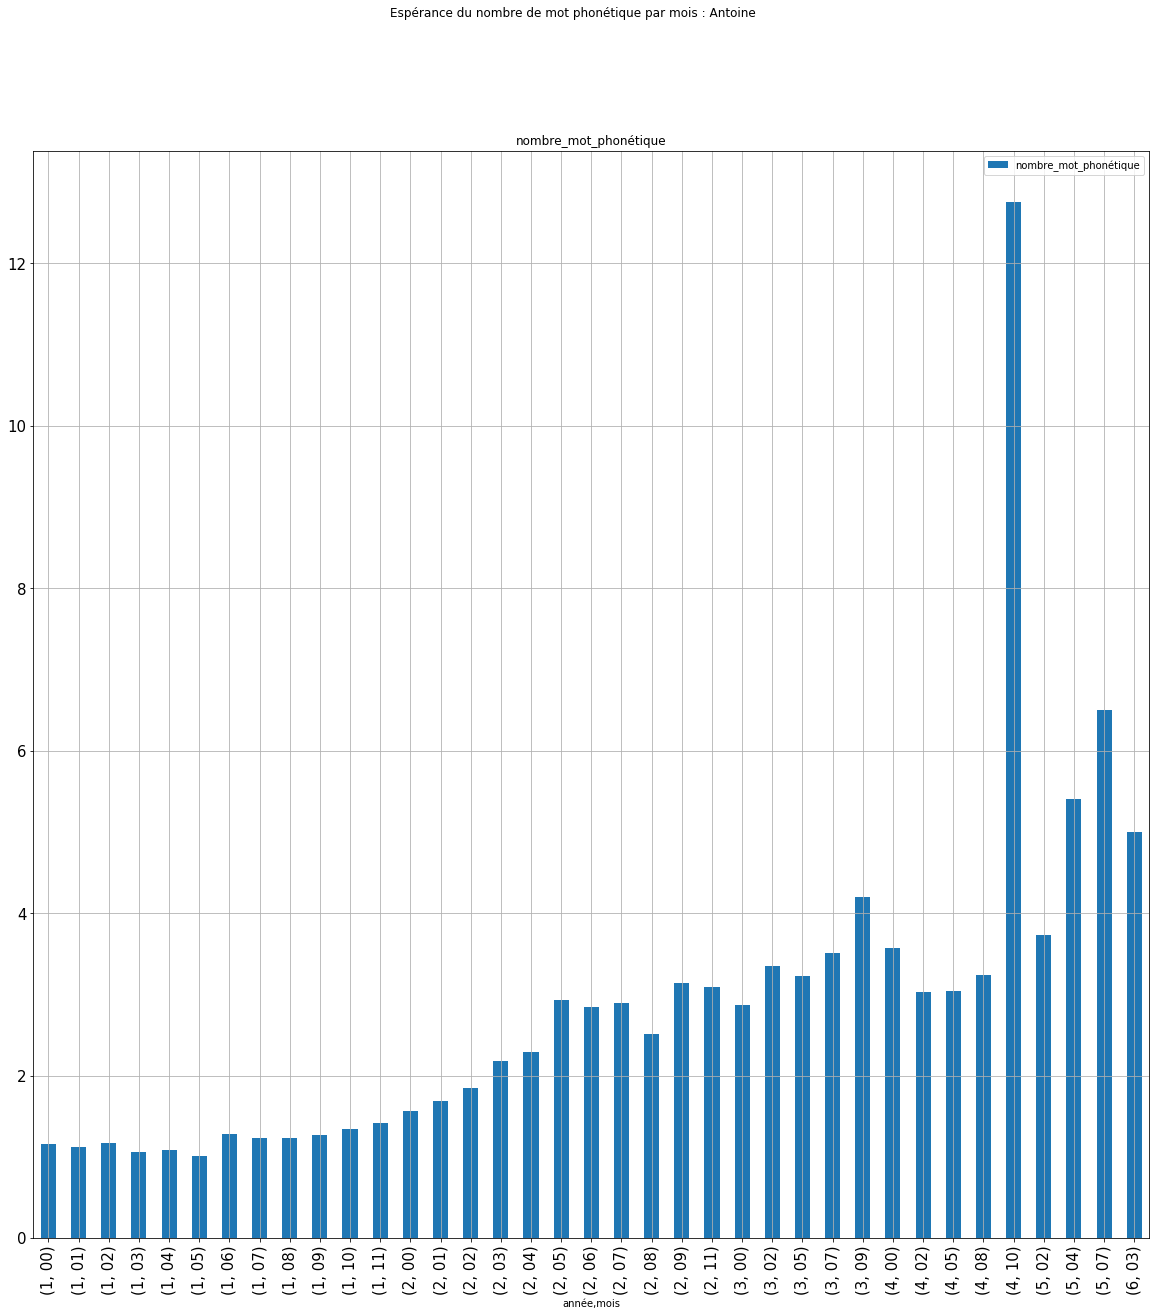

In [59]:
mean_nb_mot_pho_antoine.plot(kind='bar', 
                            subplots=True, 
                            figsize=(20, 20),
                            title = 'Espérance du nombre de mot phonétique par mois : Antoine',
                            fontsize = 15,
                            use_index = True,
                            grid=True)

* On constaste que la moyenne augmente 

### Variance du nombre de mot par phrase

In [ ]:
var_nb_mot_pho_antoine = pho_antoine[{'année','mois','nombre_mot_phonétique'}].groupby(['année','mois']).var()
var_nb_mot_pho_antoine.rename(columns={'nombre_mot_phonétique': 'variance'})

### Gestion de l'encodage

In [ ]:
import chardet

with open('data_antoine_final.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

result

In [ ]:
#data_antoine_final = pd.read_csv('data_antoine_final.csv', encoding=result['encoding'])
#data_antoine_final